# Data collections

Sentinel Hub services enable access to a large number of satellite data collections. Specifications about data collections are available in the official [Sentinel Hub service documentation](https://docs.sentinel-hub.com/api/latest/data/). In this tutorial, we will show how to obtain data from a desired data collection with `sentinelhub-py`.


## Use an existing data collection definition

A data collection is in the package defined with a `DataCollection` class.

In [1]:
from sentinelhub import DataCollection

The class contains a collection of most commonly used data collection definitions:

In [2]:
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT_MSS_L1
DataCollection.LANDSAT_TM_L1
DataCollection.LANDSAT_TM_L2
DataCollection.LANDSAT_ETM_L1
DataCollection.LANDSAT_ETM_L2
DataCollection.LANDSAT_OT_L1
DataCollection.LANDSAT_OT_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR


Each of them is defined with a number of parameters:

In [3]:
DataCollection.SENTINEL2_L2A

<DataCollection.SENTINEL2_L2A: DataCollectionDefinition(
  api_id: S2L2A
  catalog_id: sentinel-2-l2a
  wfs_id: DSS2
  collection_type: Sentinel-2
  sensor_type: MSI
  processing_level: L2A
  bands: ('B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12')
  is_timeless: False
)>

Such a data collection definition can be used as a parameter for a Process API request:

In [4]:
%matplotlib inline

from sentinelhub import SHConfig, BBox, CRS, SentinelHubRequest, MimeType

# Write your credentials here if you haven't already put them into config.json
CLIENT_ID = ''
CLIENT_SECRET = ''

config = SHConfig()
if CLIENT_ID and CLIENT_SECRET:
    config.sh_client_id = CLIENT_ID
    config.sh_client_secret = CLIENT_SECRET


# Columbia Glacier, Alaska
glacier_bbox = BBox([-147.8, 60.96, -146.5, 61.38], crs=CRS.WGS84)
glacier_size = (700, 466)
time_interval = '2020-07-15', '2020-07-16'

evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request = SentinelHubRequest(
    evalscript=evalscript_true_color,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL2_L2A,
            time_interval=time_interval,
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=glacier_bbox,
    size=glacier_size,
    config=config
)

image = request.get_data()[0]

Let's plot the image:

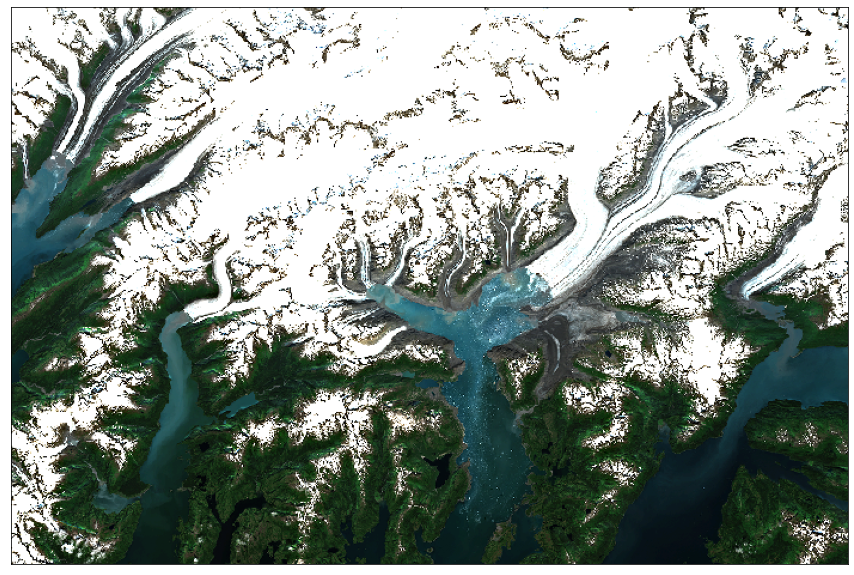

In [5]:
%matplotlib inline

from utils import plot_image

plot_image(image, factor=3.5/255, clip_range=(0,1))

Next, we'll switch data collection to Sentinel-1, which is a SAR data collection. We'll choose only data with IW polarization and limit ourselves to ascending orbits.

In [6]:
DataCollection.SENTINEL1_IW_ASC

<DataCollection.SENTINEL1_IW_ASC: DataCollectionDefinition(
  api_id: S1GRD
  catalog_id: sentinel-1-grd
  wfs_id: DSS3
  collection_type: Sentinel-1
  sensor_type: C-SAR
  processing_level: GRD
  swath_mode: IW
  polarization: DV
  resolution: HIGH
  orbit_direction: ASCENDING
  bands: ('VV', 'VH')
  is_timeless: False
)>

This time we'll use a simplified structure of an evalscript:

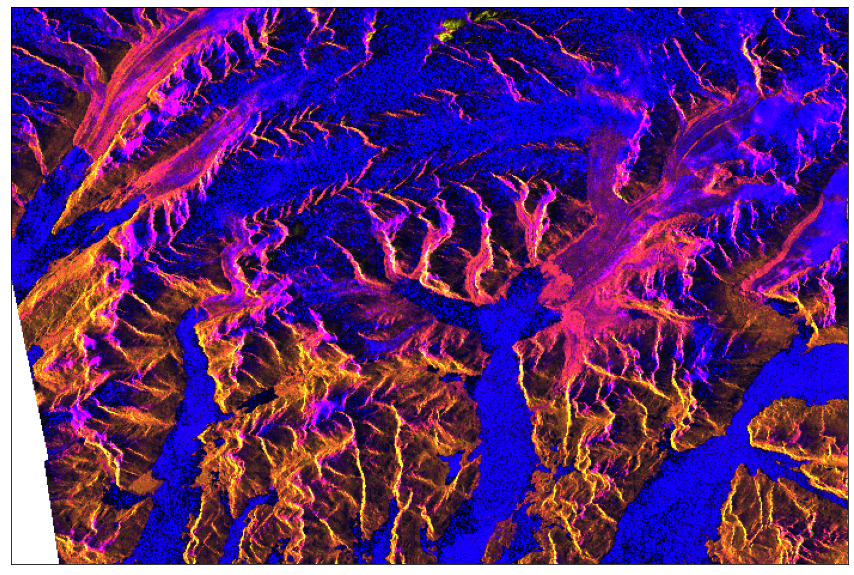

In [7]:
evalscript = """
    //VERSION=3

    return [VV, 2 * VH, VV / VH / 100.0, dataMask]
"""

time_interval = '2020-07-06', '2020-07-07'

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL1_IW_ASC,
            time_interval=time_interval,
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=glacier_bbox,
    size=glacier_size,
    config=config
)

image = request.get_data()[0]

plot_image(image, factor=3.5/255, clip_range=(0,1))

Let's also check a Sentinel-3 OLCI data collection:

In [8]:
DataCollection.SENTINEL3_OLCI

<DataCollection.SENTINEL3_OLCI: DataCollectionDefinition(
  api_id: S3OLCI
  catalog_id: sentinel-3-olci
  wfs_id: DSS8
  service_url: https://creodias.sentinel-hub.com
  collection_type: Sentinel-3
  sensor_type: OLCI
  processing_level: L1B
  bands: ('B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21')
  is_timeless: False
)>

Notice that its definition contains a `service_url` parameter. Its value is used to override a default `sh_base_url` defined in `config` object.

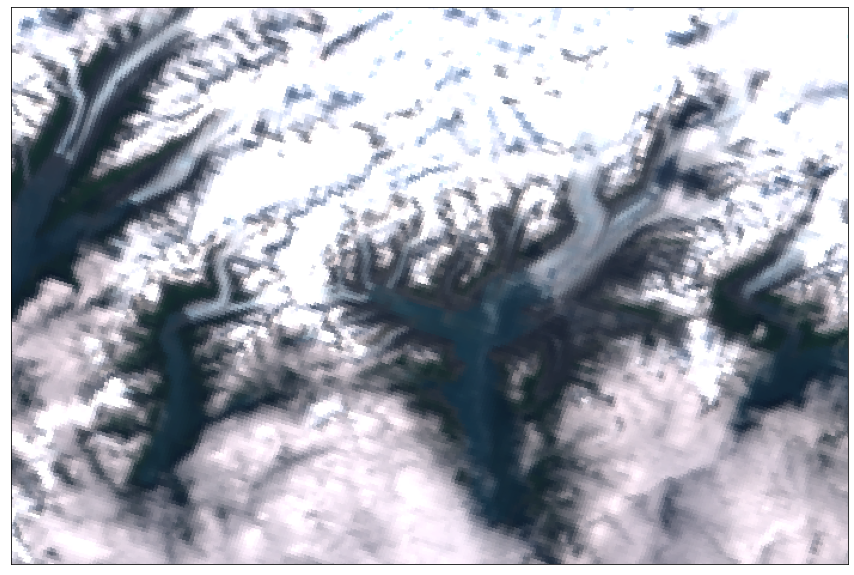

In [9]:
evalscript = """
    //VERSION=3

    return [B08, B06, B04]
"""

time_interval = '2020-07-06', '2020-07-07'

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=DataCollection.SENTINEL3_OLCI,
            time_interval=time_interval,
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=glacier_bbox,
    size=glacier_size,
    config=config
)

image = request.get_data()[0]

plot_image(image, factor=1.5/255, clip_range=(0,1))

## Define a new data collection

To support a growing number of new data collections it is possible to define a new data collection. A data collection definition supports many parameters, but it is only required to fill those parameters that will actually be required in the code.

In [10]:
DataCollection.define(
    name='CUSTOM_SENTINEL1',
    api_id='S1GRD',
    catalog_id='sentinel-1-grd',
    wfs_id='DSS3',
    service_url='https://services.sentinel-hub.com',
    collection_type='Sentinel-1',
    sensor_type='C-SAR',
    processing_level='GRD',
    swath_mode='IW',
    polarization='SV',
    resolution='HIGH',
    orbit_direction='ASCENDING',
    timeliness='NRT10m',
    bands=('VV',),
    is_timeless=False
)

<DataCollection.CUSTOM_SENTINEL1: DataCollectionDefinition(
  api_id: S1GRD
  catalog_id: sentinel-1-grd
  wfs_id: DSS3
  service_url: https://services.sentinel-hub.com
  collection_type: Sentinel-1
  sensor_type: C-SAR
  processing_level: GRD
  swath_mode: IW
  polarization: SV
  resolution: HIGH
  orbit_direction: ASCENDING
  timeliness: NRT10m
  bands: ('VV',)
  is_timeless: False
)>

The most common examples of user-defined data collections are ["bring your own data" (BYOC) data collections](https://docs.sentinel-hub.com/api/latest/data/byoc/), where users can bring their own data and access it with Sentinel Hub service. To be able to do that you will need to prepare a few things. Roughly speaking, these are the following (find all details [here](https://docs.sentinel-hub.com/api/latest/#/API/byoc)):

- Convert your data to Cloud Optimized GeoTiff (COG) format. Store it in AWS S3 bucket and allow SH to access it.
- Create a collection in SH, which points to the S3 bucket. Within the collection, ingest the tiles from the bucket.

To demonstrate this, we have prepared an example collection with a Slovenian land-cover reference map. It is available with the collection id at `7453e962-0ee5-4f74-8227-89759fbe9ba9`.

Now we can define a new BYOC data collection either with `DataCollection.define` method or with a more convenient `DataCollection.define_byoc` method:

In [11]:
collection_id = '7453e962-0ee5-4f74-8227-89759fbe9ba9'

byoc = DataCollection.define_byoc(
    collection_id,
    name='SLOVENIA_LAND_COVER',
    is_timeless=True
)

byoc

<DataCollection.SLOVENIA_LAND_COVER: DataCollectionDefinition(
  api_id: byoc-7453e962-0ee5-4f74-8227-89759fbe9ba9
  catalog_id: byoc-7453e962-0ee5-4f74-8227-89759fbe9ba9
  wfs_id: DSS10-7453e962-0ee5-4f74-8227-89759fbe9ba9
  collection_type: BYOC
  collection_id: 7453e962-0ee5-4f74-8227-89759fbe9ba9
  is_timeless: True
)>

Let's load data for defined BYOC data collection:

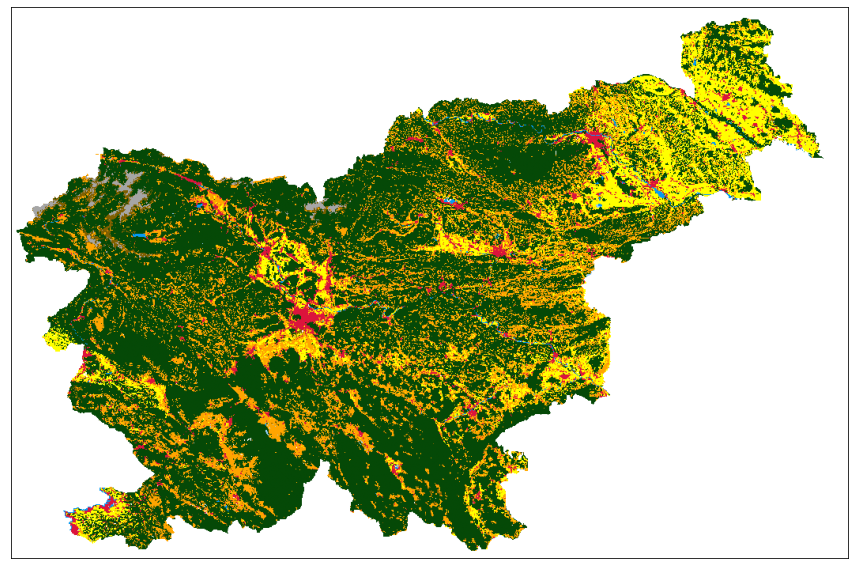

In [12]:
from sentinelhub import bbox_to_dimensions

slovenia_bbox = BBox([13.353882, 45.402307, 16.644287, 46.908998], crs=CRS.WGS84)
slovenia_size = bbox_to_dimensions(slovenia_bbox, resolution=240)

evalscript_byoc = """
//VERSION=3
function setup() {
  return {
    input: ["lulc_reference"],
    output: { bands: 3 }
  };
}

var colorDict = {
  0: [255/255, 255/255, 255/255],
  1: [255/255, 255/255, 0/255],
  2: [5/255, 73/255, 7/255],
  3: [255/255, 165/255, 0/255],
  4: [128/255, 96/255, 0/255],
  5: [6/255, 154/255, 243/255],
  6: [149/255, 208/255, 252/255],
  7: [150/255, 123/255, 182/255],
  8: [220/255, 20/255, 60/255],
  9: [166/255, 166/255, 166/255],
  10: [0/255, 0/255, 0/255]
}

function evaluatePixel(sample) {
  return colorDict[sample.lulc_reference];
}
"""

byoc_request = SentinelHubRequest(
    evalscript=evalscript_byoc,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=byoc
        )],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=slovenia_bbox,
    size=slovenia_size,
    config=config
)

byoc_data = byoc_request.get_data()
plot_image(byoc_data[0], factor=1/255)

Another option is to take an existing data collection and create a new data collection from it. The following will create a data collection with a different `service_url` parameter. Instead of collecting data from a default Sentinel Hub deployment it will collect data from [MUNDI](https://mundiwebservices.com/) deployment.

In [13]:
s2_l2a_mundi = DataCollection.define_from(
    DataCollection.SENTINEL2_L2A,
    'SENTINEL2_L2A_MUNDI',
    service_url='https://shservices.mundiwebservices.com'
)

s2_l2a_mundi

<DataCollection.SENTINEL2_L2A_MUNDI: DataCollectionDefinition(
  api_id: S2L2A
  catalog_id: sentinel-2-l2a
  wfs_id: DSS2
  service_url: https://shservices.mundiwebservices.com
  collection_type: Sentinel-2
  sensor_type: MSI
  processing_level: L2A
  bands: ('B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12')
  is_timeless: False
)>

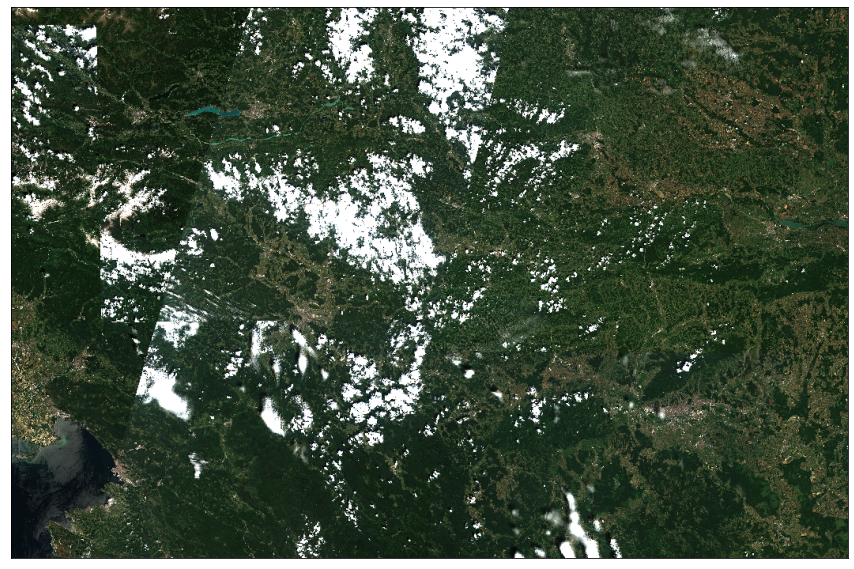

In [14]:
time_interval = '2020-06-01', '2020-07-01'

evalscript = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""

request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=s2_l2a_mundi,
            time_interval=time_interval,
            mosaicking_order='leastCC'
        )
    ],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.PNG)
    ],
    bbox=slovenia_bbox,
    size=slovenia_size,
    config=config
)

image = request.get_data()[0]

plot_image(image, factor=3.5/255, clip_range=(0,1))